# Machine Learning Spotify 

### Importing Initial Libraries used

In [1]:
#importing any required libraries
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Variables Explanation

<ol>
 <p>Id - an arbitrary unique track identifier <p>
 <p>title - track title <p>
 <p>artist - singer or band <p>
 <p>top genre - genre of the track <p>
 <p>year - year of release (or re-release) <p>
 <p>bpm - beats per minute (tempo) <p>
 <p>nrgy - energy: the higher the value the more energetic <p>
 <p>dnce - danceability: the higher the value, the easier it is to dance to this song <p>
 <p>dB - loudness (dB): the higher the value, the louder the song <p>
 <p>live - liveness: the higher the value, the more likely the song is a live recording <p>
 <p>val - valence: the higher the value, the more positive mood for the song <p>
 <p>dur - duration: the length of the song <p>
 <p>acous - acousticness: the higher the value the more acoustic the song is <p>
 <p>spch - speechiness: the higher the value the more spoken word the song contains <p>
 <p>pop - popularity: the higher the value the more popular the song is (and the target variable for this problem) <p>
    </ol>

### Importing the test and train datasets

In [2]:
#timporting the test and train data as a pandas dataframe
df1=pd.read_csv(r'/Users/aleksanderbielinski/Downloads/cs9856-spotify-regression-problem-2021/CS98XRegressionTrain.csv')
df2=pd.read_csv(r'/Users/aleksanderbielinski/Downloads/cs9856-spotify-regression-problem-2021/CS98XRegressionTest.csv')

# Data Analysis and Clearing 

The first thing we have noticed is that the dB column is in negative values. Although it possibly will not affect the algorithm, taking an absolute value of each instance in dB will ensure that the values are positive. It simply makes it easier for other people to put the actual loudness in decibels rather than the opposite value of it.

In [4]:
#absolute value of loudness
df1['dB']=df1['dB'].abs()
df2['dB']=df2['dB'].abs()

Second of all, let us check if there are any missing values. It appears that only the genre is missing, which should not be an issue since its the categorical variable for which we will be creating dummy variables later. 

In [32]:
#checking the null values
#df1.isnull()

Next we will explore the relationship between each one of the numerical variables and the popularity and see whether is there any visible strong linear relationship.

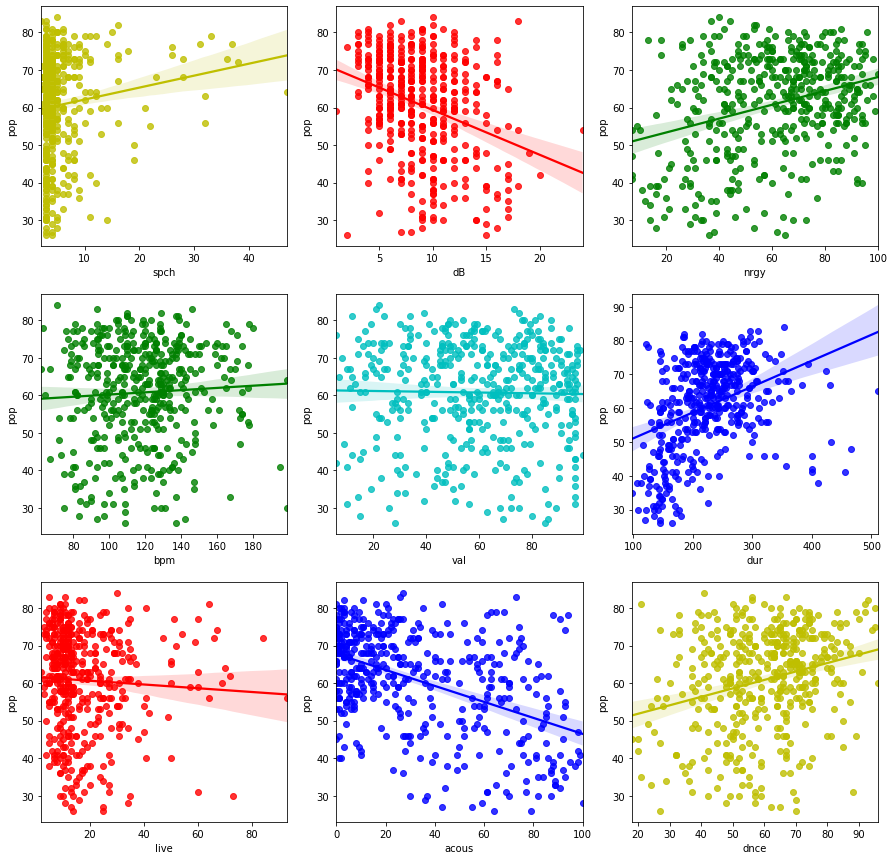

In [103]:
#plotting each numerical variable vs popularity
p_correaltion=['dB','spch','bpm','val','nrgy','dnce','live','dur','acous']
fig,axs = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.regplot(y=df1['pop'],x=df1[p_correaltion[0]],ax=axs[0,1],color='r')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[1]],ax=axs[0,0],color= 'y')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[2]],ax=axs[1,0],color='g')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[3]],ax=axs[1,1],color='c')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[4]],ax=axs[0,2],color='g')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[5]],ax=axs[2,2],color='y')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[6]],ax=axs[2,0],color='r')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[7]],ax=axs[1,2],color='b')
sns.regplot(y=df1['pop'],x=df1[p_correaltion[8]],ax=axs[2,1],color='b')
plt.show()

   To supplement the previously created graphs we will create a heatmap displaying all of the correlations within the dataset. The strongest positively correlated variables with popularity are duration (0.36), dB (0.32), dnce (0.26) and energy (0.3). Acous is showing correlation with target variable of -0.47, it is also negatively correlated with other variables, however, its shows especially strong negative correlation with dB (-0.46), nrgy (-0.66) and dance (-0.4). It means that the more loud danceable and energetic the song is the less acoustic it gets. This phenomenon is also known as multicollinearity, it reduces the precision of the estimate coefficients which weakens the statistical power of linear regression models. However, in this case, acous variable is also showing a strong correlation with a target variable thus removing it from the model might result in a worse outcome.

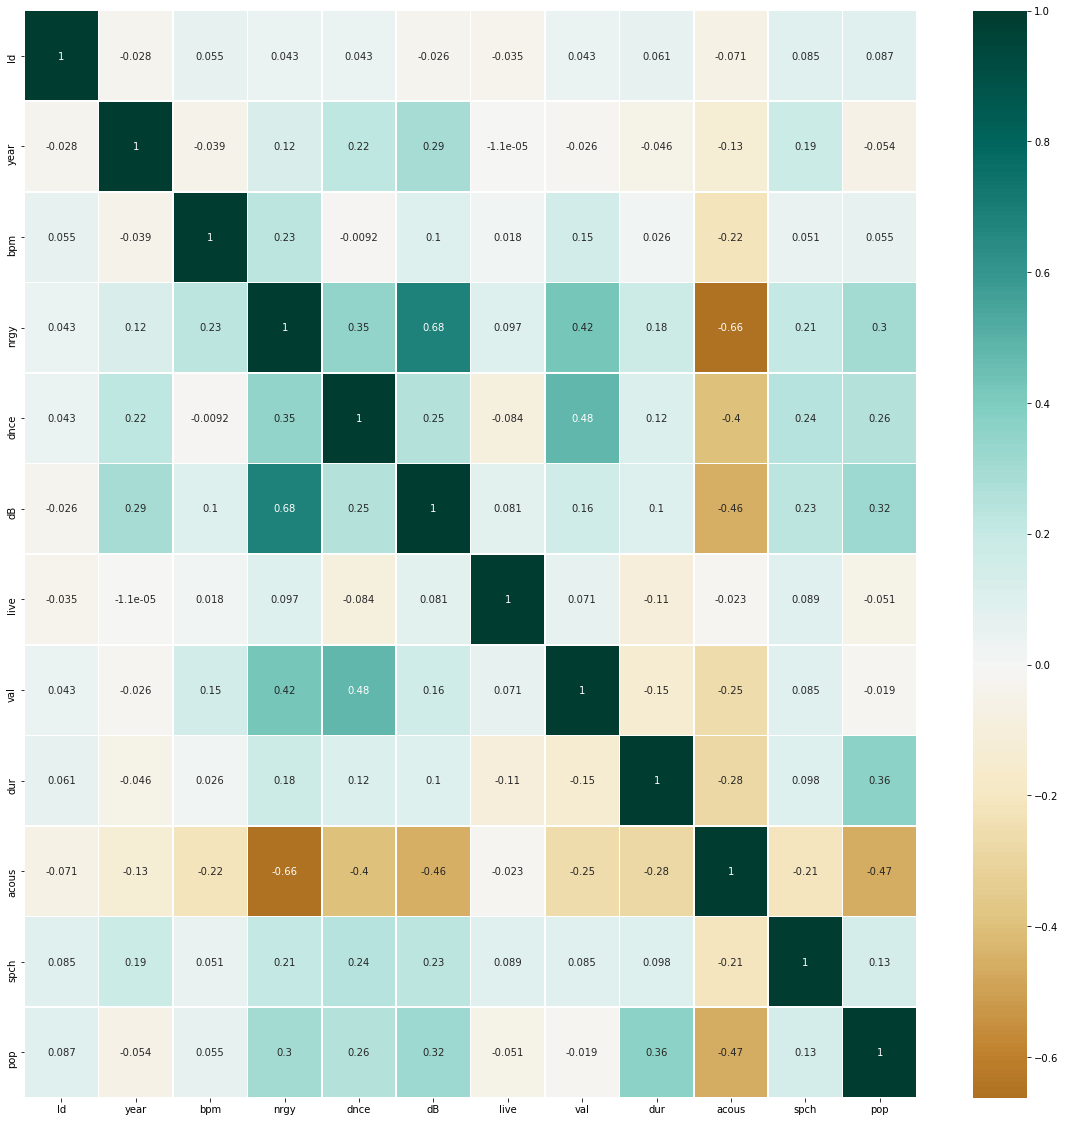

In [9]:
#The Heatmap of numerical variables 
plt.figure(figsize = (20, 20))
heatmap1=sn.heatmap(df1.corr(),center=0,cmap='BrBG', annot=True, linewidth=0.5)
plt.show()

In search of the most representative genres, we created a data frame that contains mean, median, min, max and number of values for each genre present in the train set. By doing this we can determine which genres are significantly more popular and vice versa. However, bear in mind that for the algorithm to learn that relationship, it needs enough instances usually the more the better. Although in the training dataset we were able to determine some unpopular (pop<51) and popular genres (pop>67), not all of those are present in the test set. Moreover, for some of them, there is no sufficient number of instances even in the train data. Initially, all of the genres (present in both test and train set) will be used for the model. These are: brill building pop, British invasion, dance rock, deep adult standards, europop, glam rock. In search of the appropriate cut-off points for the popularity score, we will have to establish mean max and min values of possible popularity within the train set. For the less popular ones we will be using 1st quartile(53) and for the especially popular ones 3rd quartile (71). The best results were achieved by setting the especially popular parameter at 67 rather than 71.

In [251]:
#examining the popularity column
df1['pop'].describe()

count    453.000000
mean      60.743929
std       13.470083
min       26.000000
25%       53.000000
50%       63.000000
75%       71.000000
max       84.000000
Name: pop, dtype: float64

In [253]:
#searching for most indicative genres in terms of their popularity
pd.set_option('display.max_rows',100)
top_generes=df1.groupby(['top genre']).pop.agg(['mean','median','max','min','count'])

for index, row in top_generes.iterrows():
    mean_r = row['mean']
    min_r = row['min'] 
    max_r = row['max'] 
    #tweak parameters there to achieve desired searching cryteria
    if mean_r >67 and row['count']>=5 or mean_r<53 and row['count']>=5:
        print(index,(','), mean_r,(','), min_r,(','), max_r, row['count'])

atl hip hop , 74.83333333333333 , 68.0 , 79.0 6.0
brill building pop , 45.625 , 30.0 , 72.0 16.0
british invasion , 68.375 , 43.0 , 82.0 8.0
dance rock , 68.53846153846153 , 62.0 , 80.0 13.0
deep adult standards , 35.0 , 26.0 , 49.0 6.0
europop , 67.28571428571429 , 59.0 , 75.0 14.0
glam rock , 70.75 , 51.0 , 84.0 16.0
pop , 73.6 , 67.0 , 78.0 5.0


Below is the graph displaying these genres and their popularity scores.

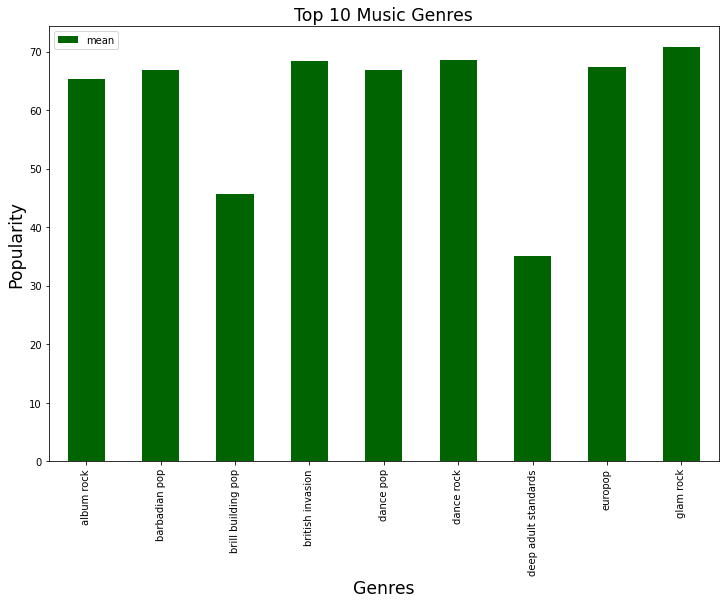

In [6]:
#plotting aboe mentioned generes in terms of their overall popularity
most_pop_gen=df1.groupby(['top genre']).pop.agg(['mean'],ascending=True)
top_10_genres=most_pop_gen.loc[['album rock','barbadian pop','brill building pop','british invasion','dance pop','dance rock','deep adult standards','europop','glam rock']]
top_10_genres.plot.bar(color='darkgreen', figsize=(12,8))
plt.xlabel('Genres', size='xx-large')
plt.ylabel('Popularity',size='xx-large')
plt.title("Top 10 Music Genres", size='xx-large')
plt.show()

Although the year is in the numerical format it will be useful to group them into separate categories and then create a dummy variable for one of each eg. the 90s,70s etc. Then the same procedure for the genres will be applied to detect significantly popular and unpopular eras. 

In [4]:
#creating a categories for each era
def cathegory_year (a):
    if 1940<a<=1950:
        return '40s'
    elif 1950<a<=1960:
        return '50s'  
    elif 1960<a<=1970:
        return '60s'
    elif 1970<a<=1980:
        return '70s'
    elif 1980<a<=1990:
        return '80s'
    elif 1990<a<=200:
        return '90s'
    elif 2000<a<=2010:
        return '00s'
    elif 2010<a:
        return '10s'
year_bracket=df1['year']

plist=[]

for i in range (len(year_bracket)):
    plist.append(cathegory_year(year_bracket[i]))
    
df1['era']=plist
#same applied to the test data set

year_bracket_test=df2['year']

plist1=[]

for j in range (len(year_bracket_test)):
    plist1.append(cathegory_year(year_bracket_test[j]))
    
df2['era']=plist1

In [249]:
#not used in the model
def oldie (c):
    if c <=1980:
        return 'oldie'
    elif c >= 2000: 
        return 'new'
year_bracket=df1['year']
plist=[]

for k in range (len(year_bracket)):
    plist.append(oldie(year_bracket[k]))
    
df1['time']=plist

year_bracket_test=df2['year']

plist1=[]

for j in range (len(year_bracket_test)):
    plist1.append(oldie(year_bracket_test[j]))
    
df2['time']=plist1

In [217]:
#not used in the model
def year (b):
    if b==1959:
        return "1959"
    elif b==1981:
        return "1981"
    elif b==2018:
        return "2018"
year_bracket=df1['year']
plist=[]
for i in range (len(year_bracket)):
    plist.append(year(year_bracket[i]))
df1['year']=plist

year_bracket_test=df2['year']

plist1=[]

for j in range (len(year_bracket_test)):
    plist1.append(year(year_bracket_test[j]))
    
df2['year']=plist1

Similarly to the previous categorical variable, we will now try to determine which "era" categories to include in the model. We found that songs released after 2010 and those created between 1950 and 1960 are significantly unpopular.

In [255]:
#searching for most indicative eras in terms of their popularity
pd.set_option('display.max_rows',100)
top_era=df1.groupby(['era']).pop.agg(['mean','median','max','min','count','median'])

for index, row in top_era.iterrows():
    mean_r = row['mean']
    min_r = row['min'] 
    max_r = row['max']
    #tweak parameters there to achieve desired searching cryteria
    if mean_r>67 and row['count']>=5 or mean_r<53 and row['count']>=5:
        print(index,(','), mean_r,(','), min_r,(','), max_r, row['count'], row['median'])

10s , 50.05357142857143 , 26.0 , 78.0 56.0 median    51.0
median    51.0
Name: 10s, dtype: float64
50s , 40.833333333333336 , 26.0 , 48.0 6.0 median    44.5
median    44.5
Name: 50s, dtype: float64


In [250]:
#not used in the model
top_time=df1.groupby(['time']).pop.agg(['mean','median','max','min','count'])

for index, row in top_time.iterrows():
    mean_r = row['mean']
    min_r = row['min'] 
    max_r = row['max'] 
    if max_r - mean_r<=50 and mean_r - min_r<=50 and row['count']>10:
        print(index,(','), mean_r,(','), min_r,(','), max_r, row['count'])

new , 59.0 , 26.0 , 83.0 178.0
oldie , 60.114285714285714 , 26.0 , 84.0 140.0


Next explore the most and least popular artists as well.

In [231]:
#searching for most indicative artists in terms of their popularity
top_artist=df1.groupby(['artist']).pop.agg(['mean','median','max','min','count'])
for index, row in top_artist.iterrows():
    count_r = row['count']
    mean_r = row['mean']
    min_r = row['min'] 
    max_r = row['max'] 
    #if max_r - mean_r<=5 and mean_r - min_r<=5 and count_r>=2:
    if mean_r >68 and row['count']>=5 or mean_r<53 and row['count']>=5:
        print(index,(','), mean_r,(','), min_r,(','), max_r,(','), count_r)

Elton John , 68.77777777777777 , 62.0 , 81.0 , 9.0
Queen , 73.28571428571429 , 51.0 , 84.0 , 7.0
Rihanna , 73.8 , 71.0 , 77.0 , 5.0
The Beatles , 76.5 , 67.0 , 82.0 , 6.0


Having created the new category called era, we can now create dummy variables. In this case, dummies will be created for each category in the era column, earlier listed music genres and artists. The next step will be to drop unwanted columns for the regression from the dataset. Then all of the columns that hold categorical values will be dropped from both datasets.

In [6]:
#creating the dummy variables 
dummy_train=pd.get_dummies(df1[['top genre','era','artist']])
dummy_genre_train=dummy_train.filter(['top genre_album rock','top genre_barbadian pop','top genre_brill building pop','top genre_british invasion','top genre_dance pop','top genre_dance rock','top genre_deep adult standards','top genre_europop','top genre_glam rock','era_10s','era_50s','era_80s','artist_ABBA','artist_Elton John','artist_The Beatles','artist_Whitney Houston','artist_Rihanna','artist_Queen'],axis=1)
#again the same goes for the test dataset 
dummy_test=pd.get_dummies(df2[['top genre','era','artist']])
dummy_genre_test=dummy_test.filter(['top genre_album rock','top genre_barbadian pop','top genre_brill building pop','top genre_british invasion','top genre_dance pop','top genre_dance rock','top genre_deep adult standards','top genre_europop','top genre_glam rock','era_10s','era_50s','era_80s','artist_ABBA','artist_Elton John','artist_The Beatles','artist_Whitney Houston','artist_Rihanna','artist_Queen'],axis=1)

In [7]:
#dropping the categorical columns
cols=[0,1,2,3,4]
df1 = df1.drop(df1.columns[cols], axis =1)
#same for the test dataset
df2 = df2.drop(df2.columns[cols], axis =1)

With categorical values chosen, we will now focus on picking the right numerical values for the model. By exploring the outliers and correlations we will be able to pick variables that are relevant to the model.

The next step is to scale all of the remaining numerical variables. Before deciding which type of scaler will be most appropriate we should see whether there are outliers present in the data. To do so we will create Inter Quartile Range for the remaining numerical variables and based on that we will be able to see which regressand have outliers. Using standard scaler gave us the best result, however as it removes the mean and scales the data to unit variance it is sensitive to the outliers. To reduce the impact of the outliers we will cap and floor them according to 90th and 10th percentile. We realised that the outliers are different for train and test set, capping and flooring were performed in accordance to training data and test data, with better results coming from test data thus its percentiles will be used. 

In [8]:
#Ensuring that only numerical variables are scalled excluding popularity (target varaible)
num_cols = df2.columns[df2.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch'], dtype='object')

There are 40 outliers present in the spch variable, 25 in dB and 12 in dur, 3 in bpm and 3 in dnce. However, the best results were achieved by capping only acous and dB in which the number of outliers was the highest. 

In [259]:
#exploring the outliers based on IQR
pd.set_option('display.max_rows',500)
#based on IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
outliers=(df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))
#outliers
bp=outliers['bpm'].value_counts()
nrg=outliers['nrgy'].value_counts()
dnc=outliers['dnce'].value_counts()
db=outliers['dB'].value_counts()
liv=outliers['live'].value_counts()
val=outliers['val'].value_counts()
dur=outliers['dur'].value_counts()
acous=outliers['acous'].value_counts()
spch=outliers['spch'].value_counts()
print ("outliers:", 'BPM:', bp, 'NRGY:', nrg, 'DNC',dnc,'dB',db,'LIVE',liv,'VAL',val,'DUR',dur,'ACOUS', acous,'SPCH',spch) 

outliers: BPM: False    450
True       3
Name: bpm, dtype: int64 NRGY: False    453
Name: nrgy, dtype: int64 DNC False    453
Name: dnce, dtype: int64 dB False    450
True       3
Name: dB, dtype: int64 LIVE False    428
True      25
Name: live, dtype: int64 VAL False    453
Name: val, dtype: int64 DUR False    441
True      12
Name: dur, dtype: int64 ACOUS False    453
Name: acous, dtype: int64 SPCH False    413
True      40
Name: spch, dtype: int64


In [260]:
#caps and floors for choosen numerical variables
print(df1['dB'].quantile(0.10))
print(df1['dB'].quantile(0.90))
print(df1['acous'].quantile(0.10))
print(df1['acous'].quantile(0.90))
print('min db', df2['dB'].quantile(0.10))
print('max db', df2['dB'].quantile(0.90))
print('min acous', df2['acous'].quantile(0.10))
print('max acous', df2['acous'].quantile(0.90))
print(df1['val'].quantile(0.10))
print(df1['val'].quantile(0.90))
print('min val', df2['val'].quantile(0.10))
print('max val', df2['val'].quantile(0.90))
print(df1['bpm'].quantile(0.10))
print(df1['bpm'].quantile(0.90))
print('min bpm', df2['bpm'].quantile(0.10))
print('max bpm', df2['bpm'].quantile(0.90))
print(df1['dnce'].quantile(0.10))
print(df1['dnce'].quantile(0.90))
print('min dnce', df2['dnce'].quantile(0.10))
print('max dnce', df2['dnce'].quantile(0.90))    

5.0
14.0
1.0
80.60000000000002
min db 5.0
max db 15.0
min acous 1.0
max acous 81.4
23.0
92.80000000000001
min val 24.3
max val 86.0
85.2
148.0
min bpm 90.6
max bpm 155.7
39.0
79.0
min dnce 39.3
max dnce 79.0


In [9]:
#capping and flooring the outliers
df1['dB'] = np.where(df1['dB'] <5, 5,df1['dB'])
df1['dB'] = np.where(df1['dB'] >15, 15,df1['dB'])
df2['dB'] = np.where(df2['dB'] <5, 5,df2['dB'])
df2['dB'] = np.where(df2['dB'] >15, 15,df2['dB'])
df1['acous'] = np.where(df1['acous'] <1, 1,df1['acous'])
df1['acous'] = np.where(df1['acous'] >81.4, 81.4,df1['acous'])
df2['acous'] = np.where(df2['acous'] <1, 1,df2['acous'])
df2['acous'] = np.where(df2['acous'] >81.4, 81.4,df2['acous'])
#df1['val'] = np.where(df1['val'] <24.3, 24.3,df1['val'])
#df1['val'] = np.where(df1['val'] >86, 86,df1['val'])
#df2['val'] = np.where(df2['val'] <24.3, 24.3,df2['val'])
#df2['val'] = np.where(df2['val'] >86, 86,df2['val'])
#df1['bpm'] = np.where(df1['bpm'] <90.6, 90.6,df1['bpm'])
#df1['bpm'] = np.where(df1['bpm'] >155.7, 155.7,df1['bpm'])
#df2['bpm'] = np.where(df2['bpm'] <90.6, 90.6,df2['bpm'])
#df2['bpm'] = np.where(df2['bpm'] >155.7, 155.7,df2['bpm'])
#df1['dnce'] = np.where(df1['dnce'] <39.3, 39.3,df1['dnce'])
#df1['dnce'] = np.where(df1['dnce'] >79, 79,df1['dnce'])
#df2['dnce'] = np.where(df2['dnce'] <39.3, 39.3,df2['dnce'])
#df2['dnce'] = np.where(df2['dnce'] >79, 79,df2['dnce'])

In [10]:
#scalling the data using standard scaler
from sklearn.preprocessing import StandardScaler
rbst_scaler = StandardScaler()
df1[num_cols] = rbst_scaler.fit_transform(df1[num_cols])
df2[num_cols] = rbst_scaler.fit_transform(df2[num_cols])

In [98]:
#not used in the model as capping and flooring outliers gave better results
from sklearn.preprocessing import RobustScaler
rbst_scaler = RobustScaler()
df1[num_cols] = rbst_scaler.fit_transform(df1[num_cols])
df2[num_cols] = rbst_scaler.fit_transform(df2[num_cols])

Adding the earlier created dummy variables to the now scaled datasets.

In [11]:
#merging the dummy dataset with the scaled one
DF = pd.concat([dummy_genre_train, df1], axis =1)
#again the same goes for the test data
DF2 = pd.concat([dummy_genre_test, df2], axis =1)

Let us create a heatmap for the new dataset with dummy variables included. We will be able to check whether there is any degree of multicollinearity. In case of any correlation between the variables, we will consider removing some of them from the algorithm, otherwise, it would carry unnecessary additional weight.  

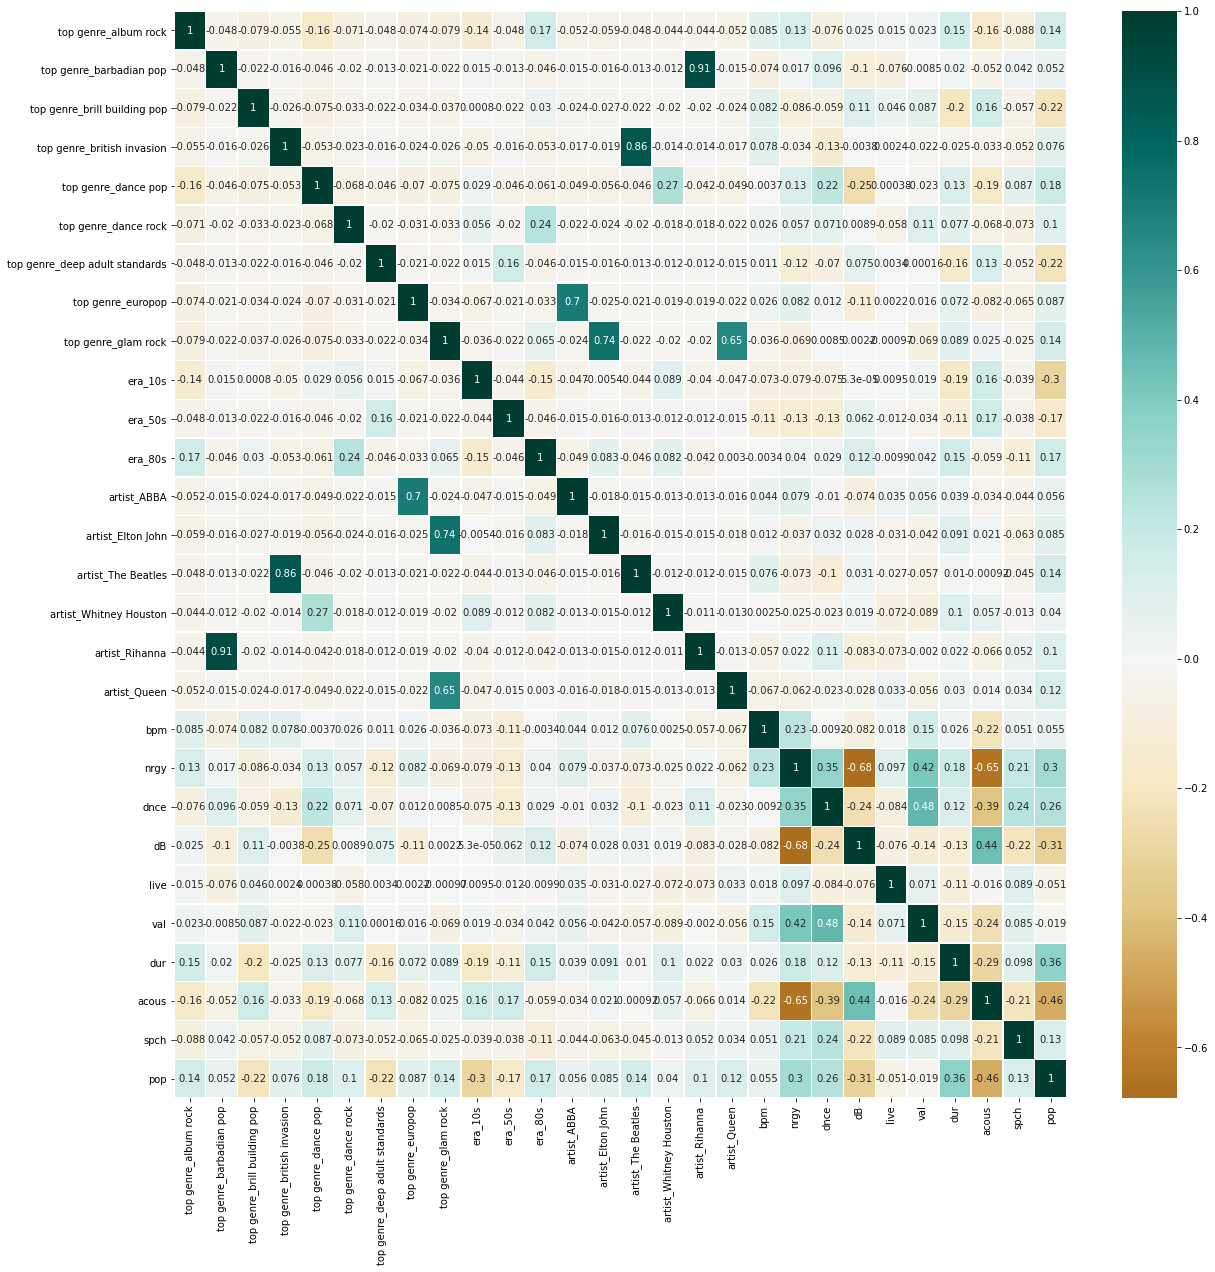

In [264]:
#plotting the heatmap 
plt.figure(figsize = (20, 20))
heatmap1=sn.heatmap(DF.corr(),center=0,cmap='BrBG', annot=True, linewidth=0.5)
plt.show()

# Supervised Learning Algorithms

Now we can pick independent variables (X1) and dependent one (y1) picked for the algorithm. We will start by including all of them and then removing those which reduce the model accuracy. 

In [27]:
X1 = DF[['top genre_brill building pop','top genre_dance rock','top genre_deep adult standards','top genre_glam rock','era_10s','era_50s','artist_Queen','artist_The Beatles','spch','dB','nrgy','dnce','dur','acous']]
y1 = DF['pop'].to_numpy()
#same set of variables for the actual test set
X_test_eva_1=DF2[['top genre_brill building pop','top genre_dance rock','top genre_deep adult standards','top genre_glam rock','era_10s','era_50s','artist_Queen','artist_The Beatles','spch','dB','nrgy','dnce','dur','acous']]

## SVR Regression

After clearing and preparing all of the data now is the time to train and evaluate the chosen regression model. Thanks to a relatively small number of instances in this data set SVR regression seems like a good choice. This algorithm aims to fit as many instances as possible within the decision boundaries (street). The width of the street is controlled by the epsilon parameter and in this case, we will be using a radial basis function kernel (rbf) since it gave us the best results.

To evaluate the model we will be using Root Mean Square Error (RMSE) and coefficient of determination other referred to as R^2. Rather than relying on a single test, we will perform a 1000 tests and then determine the minimum maximum and the mean values for both RMSE and R^2. RMSE measures how far the predicted variable is from the actual one, whereas R^2 shows how much variance is explained by the model. Generally, the good models would show the RMSE values lower than the Naive estimate and higher R^2 scores. In the best-case scenario SVR model was able to capture 62% of the variance in the data and achieved RMSE of 8. However given the fact that the highest RMSE was 13.79 with negative R^2 (meaning that the prediction is less accurate than the average value of the data set over time), the average RMSE and R^2 were 10.66 and 0.35 accordingly. Given the low consistency of the model, we will try different models which would be therefore combined into the Voting Regressor. 

In [32]:
#SVR RBF kernel
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import model_selection
svm_rbf_reg = SVR(kernel='rbf',gamma='scale', degree=1, C=6, epsilon=0.4)
mean_r = 0
min_r = 100
max_r = 0
mean_rsq = 0
max_rsq = -1
min_rsq = 0
iterations=1000
i=1
while i<iterations:
    X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X1, y1, test_size=0.15)
    svm_rbf_reg.fit(X_train, Y_train)
    spotify_predictions = svm_rbf_reg.predict(X_test)
    lin_mse = mean_squared_error(Y_test, spotify_predictions)
    lin_rmse = np.sqrt(lin_mse)
    r_sq_lin = svm_rbf_reg.score(X_test, Y_test)
    mean_rsq+=r_sq_lin
    mean_r+=lin_rmse
    if lin_rmse < min_r:
        min_r=lin_rmse
    if lin_rmse > max_r:
        max_r = lin_rmse
    if r_sq_lin < min_rsq:
        min_rsq = r_sq_lin
    if r_sq_lin > max_rsq:
        max_rsq = r_sq_lin
    i+=1
print ('mean RMSE is:', mean_r/iterations,'mean R^2 is:',mean_rsq/iterations)
print ('max RMSE is:', max_r, 'max r^2 is:', max_rsq)
print ('min RMSE is:', min_r, 'min r^2 is:', min_rsq)

mean RMSE is: 10.668155909021335 mean R^2 is: 0.35411900967315985
max RMSE is: 13.796499151134158 max r^2 is: 0.620482197148412
min RMSE is: 8.00290504957668 min r^2 is: -0.0760009290725494


# Constructing Voting Regressor- Ensemble methods

With one model in place, the main focus now is to make the model more accurate and consistent. To do so we will be using Voting Regressor since it aims to reduce the variance in the prediction error by fitting several regressors on the whole data set. The Voting Regressor was chosen as the purpose of this task is to predict popularity score as accurately as possible, thus we aim for the lowest RMSE possible. Several models will be tested out of which we will choose the top 3 performers that will be a part of Voting Regressor. The new final prediction model (blender) will aggregate all of the predictions made by each model and create the final one, which in theory should be more accurate. 
  
Note that each of the model parameters was adjusted so that the model would result in the best outcome e.g. lowest RSME and highest R^2.

## Stochstic Gradient Descent- SGD Model

Stochastic Gradient Descent (SGD) model is a linear model fitted by minimizing a regularized empirical loss with Stochastic Gradient Descent. It picks a random instance of the dataset at each step and computes the gradient-based on just that instance. Loss parameter defines the loss function to be used, in this case "squared loss", which refers to the ordinary least squares. The penalty parameter also known as the regularization term was set to l2. Alpha is the constant which multiplies the regularization term and eta0 is the initial learning rate for the constant. Although, taking all variables for the linear regression is not a good choice, since low correlations between the target variable and some of the independent ones, the variables we used show a correlation of at least 0.1 or -0.1. By removing the less "relevant" ones we adjusted the data for linear algorithms. After tweaking parameters to check which gives the best results, it came out that the default setting was the best with mean RMSE of 10.71 and R^2 of 0.34. Again in this case the model was not very consistent.

In [33]:
#SGD
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(loss='squared_loss',alpha=0.0001, epsilon=0.01, eta0=0.01,penalty='l2')
mean_r = 0
min_r = 100
max_r = 0
mean_rsq = 0
max_rsq = -1
min_rsq = 0
iterations=1000
i=1
while i<iterations:
    X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X1, y1, test_size=0.15)
    reg.fit(X_train, Y_train)
    spotify_predictions = reg.predict(X_test)
    mse = mean_squared_error(Y_test, spotify_predictions)
    rmse = np.sqrt(mse)
    r_sq = reg.score(X_test, Y_test)
    mean_r += rmse
    mean_rsq += r_sq
    if rmse < min_r:
        min_r = rmse
    if rmse > max_r:
        max_r = rmse
    if r_sq < min_rsq:
        min_rsq = r_sq
    if r_sq > max_rsq:
        max_rsq = r_sq
    i+=1
print ('mean RMSE is:', mean_r/iterations,'mean R^2 is:',mean_rsq/iterations)
print ('max RMSE is:', max_r, 'max r^2 is:', max_rsq)
print ('min RMSE is:', min_r, 'min r^2 is:', min_rsq)

mean RMSE is: 10.713102040718788 mean R^2 is: 0.34666217337263394
max RMSE is: 13.538404958595152 max r^2 is: 0.6437179597552101
min RMSE is: 7.7791377990266435 min r^2 is: -0.09822698730656443


## Random Forests Regressor

A random forest fits several regressing decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It splits the data into the various sub-sets and tries to predict the value based on that subsets. Max_samples parameter determines the maximum number of instances in each sub-set. The best trade-off between the bias (likely to underfit) and variance (likely to overfit) the minimum samples split was set to 5. This allowed for the algorithm to assign no more than 5 instances to each leaf. The n_estimators parameter defines the number of decysion trees used in the algorithm, with 100 (default setting) we were able to achive the best results. This algorithm is especially useful in improving the predictive accuracy and control over-fitting, which is exactly what we aim for. If a bootstrap parameter is set to false (default=True) the whole dataset is used to train each decision tree. Note that this algorithm does not require scaling as it does not affect the output, which is due to the way the algorithm works. It goes from observations about an instance (represented in the branches) to conclusions about the instance target value. The mean RMSE and R^2 are 10.58 and 0.53 accordingly. However, the model wasn't able to match the performance of previous techniques resulting in higher minimum values of RMSE and R^2. 

In [35]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(criterion='mse',max_depth=None, min_samples_leaf=2, min_samples_split=5, max_samples=30, n_estimators=100)

mean_r = 0
min_r = 100
max_r = 0
mean_rsq = 0
max_rsq = -1
min_rsq = 0
iterations=1000
i=1
while i<iterations:
    X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X1, y1, test_size=0.15)
    reg.fit(X_train, Y_train)
    spotify_predictions = reg.predict(X_test)
    mse_g = mean_squared_error(Y_test, spotify_predictions)
    rmse_g = np.sqrt(mse_g)
    r_sq = reg.score(X_test, Y_test)
    mean_r += rmse_g
    mean_rsq += r_sq
    if rmse_g < min_r:
        min_r = rmse_g
    if rmse_g > max_r:
        max_r = rmse_g
    if r_sq < min_rsq:
        min_rsq = r_sq
    if r_sq > max_rsq:
        max_rsq = r_sq
    i+=1
print ('mean RMSE is:', mean_r/iterations,'mean R^2 is:',mean_rsq/iterations)
print ('max RMSE is:', max_r, 'max r^2 is:', max_rsq)
print ('min RMSE is:', min_r, 'min r^2 is:', min_rsq)

mean RMSE is: 10.589798123489862 mean R^2 is: 0.34978222927589075
max RMSE is: 13.062377903532324 max r^2 is: 0.5337241825820591
min RMSE is: 8.51798001706264 min r^2 is: -0.22930288808549926


## Voting Regressor

Now we will compile those 3 models into a voting regressor. All of the models used achieved similar results both in terms of RMSE and R^2, however, they are all work in a different way indicating that the errors they make are likely to be different. The role of Voting Regressor is to compensate for that and produce model that would be both more accurate and consistent.

In [36]:
#Voting Regressor
from sklearn.ensemble import VotingRegressor
reg1 = SVR(kernel='rbf',gamma='scale', degree=1, C=6, epsilon=0.4)
reg2 = SGDRegressor(loss='squared_loss',alpha=0.0001, epsilon=0.01, eta0=0.01,penalty='l1')
reg3 =RandomForestRegressor(criterion='mse',max_depth=None, min_samples_leaf=2, min_samples_split=5, max_samples=30, n_estimators=200)

reg = VotingRegressor(estimators=[('SVR', reg1), ('SDG', reg2), ('RD',reg3)])
mean_r = 0
min_r = 100
max_r = 0
mean_rsq = 0
max_rsq = -1
min_rsq = 0
iterations=1000
i=1
while i<iterations:
    X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X1, y1, test_size=0.15)
    reg.fit(X_train, Y_train)
    spotify_predictions = reg.predict(X_test)
    mse_g = mean_squared_error(Y_test, spotify_predictions)
    rmse_g = np.sqrt(mse_g)
    r_sq = reg.score(X_test, Y_test)
    mean_r += rmse_g
    mean_rsq += r_sq
    if rmse_g < min_r:
        min_r = rmse_g
    if rmse_g > max_r:
        max_r = rmse_g
    if r_sq < min_rsq:
        min_rsq = r_sq
    if r_sq > max_rsq:
        max_rsq = r_sq
    i+=1
print ('mean RMSE is:', mean_r/iterations,'mean R^2 is:',mean_rsq/iterations)
print ('max RMSE is:', max_r, 'max r^2 is:', max_rsq)
print ('min RMSE is:', min_r, 'min r^2 is:', min_rsq)

mean RMSE is: 10.137338288633416 mean R^2 is: 0.3934553942707846
max RMSE is: 12.278979229441639 max r^2 is: 0.5750438560530629
min RMSE is: 8.414210579364577 min r^2 is: 0


# Predictions Kaggle Competion and Final Conclusions

## Predicted vs Actual Graph

To visualise the predictions we have plotted the predicted vs the actual instances for the VotingRegressor model used. The perfect fit would result in the scatters being distributed over the main diagonal line. Based on the graph we can observe that the model performs the best while predicting popularity scores between approximately 50 and 65, whereas fails to correctly assign higher and lower popularity scores. It is directly linked to the number of instances present within those ranges. Most songs have popularity between 50 and 65, whereas the test data lacks songs of high and low popularity. 

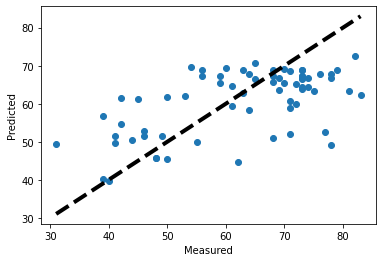

In [37]:
#predicted vs actual graph
fig, ax = plt.subplots()
ax.scatter(Y_test, spotify_predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

As expected combining those models into the Voting Regressor allowed us to achieve on the average better and more consistent algorithm. The difference between min and max RMSE was the lowest. This algorithm achieved the RMSE score of 10.13 and was able to explain nearly 40% of the variance.  In the Kaggle competition the model achieved the RMSE score of 8.17, which is better than the best case scenario when testing on the train set. However, the best entries in the competition oscillate within 7.3 RMSE thus indicating that on average our model results in making errors of nearly one larger than the best entry. There might be plenty of reasons behind that such as:
 <ol>
 <p> Different algorithms applied<p>
 <p> Different variables used<p>
 <p> Different scaling applied<p>
 <p> Different models' parameters used <p>
 </ol>
We have also tried to apply number of different algorithms and variables used. Which include:
<ol>
 <p> KNeighborsRegressor, Linear regression<p>
 <p> Using only numerical variables<p>
 <p> Scalling using RobusRegressor and MinMax Scaler<p>
 <p> Creating other categorical variables<p>
 </ol>
However, the current model (VotingRegressor) with mix of categorical and numerical variables gave the best result of RMSE, R^2 was not provided within the competition. Having access to data with more instances could probably improve our score, however, it is possible that during the analysis process something important was omitted, thus resulting in a weaker score compared to the others. We found the result from Kaggle being between the minimum and mean RMSE of the models used. It is important to mention that the Kaggle RMSE score is based upon only half of the test data, the final value of RMSE might therefore be higher or lower. Our personal belief is that better RMSE scores were achieved through better configuration of Independent Variables and the use of accurate Ensemble Methods. 

# Creating Predictions for Kaggle Test set

In [25]:
#Using thw whole train data to fit the model and creating predictions for the test data.
#reg = VotingRegressor(estimators=[('SVR', reg1), ('SDG', reg2), ('RD',reg3)])
reg1 = SVR(kernel='rbf',gamma='scale', degree=1, C=6, epsilon=0.4)
reg2 = SGDRegressor(loss='squared_loss',alpha=0.0001, epsilon=0.01, eta0=0.01,penalty='l1')
#reg3 = RandomForestRegressor(criterion='mse',max_depth=None, min_samples_leaf=2, min_samples_split=6)
reg3 = RandomForestRegressor(criterion='mse',max_depth=None, min_samples_leaf=2, min_samples_split=5, max_samples=30, n_estimators=1000)
reg = VotingRegressor(estimators=[('SVR', reg1), ('SDG', reg2), ('RD',reg3)])

reg.fit(X1, y1)

spotify_predictions = reg.predict(X_test_eva_1)

In [22]:
#extracting the id column
df2_check=pd.read_csv(r'/Users/aleksanderbielinski/Downloads/cs9856-spotify-regression-problem-2021/CS98XRegressionTest.csv')
df2_check= df2_check.loc[:, :'Id']

In [26]:
#merging the id column with predictions
pd.set_option('display.max_rows',114)
eval_2=pd.concat([df2_check, pd.DataFrame(spotify_predictions)], axis=1)
eval_2.columns = ['id', 'pop']

In [24]:
#extracting the csv file containing predictions and id for the test set.
eval_2.to_csv(r'/Users/aleksanderbielinski/Desktop/Eva57.csv',index=False)

# Spotify Classification Problem 

##### Import Relevant Libraries 

In [15]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

##### Import Datasets 

In [16]:
df1 = pd.read_csv(r"/Users/aleksanderbielinski/Downloads/cs9856-spotify-classification-problem-2021/CS98XClassificationTrain.csv") 
#Note: Important Train dataset, with around 400 values. Needs to be cleaned and used with the test dataset 
df2 = pd.read_csv(r"/Users/aleksanderbielinski/Downloads/cs9856-spotify-classification-problem-2021/CS98XClassificationTest.csv") 
#Importat Test dataset 

In [36]:
df1.isnull().sum()
#Checking null values

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [17]:
#clearing the missing values
df1 = df1.dropna()

In [18]:
#again in this case dB values will be transofrmed into the absolute ones
df1['dB']=df1['dB'].abs()
df2['dB']=df2['dB'].abs()

##### Data visualisation

Text(0.5, 1.0, 'Frenquency chart of genres')

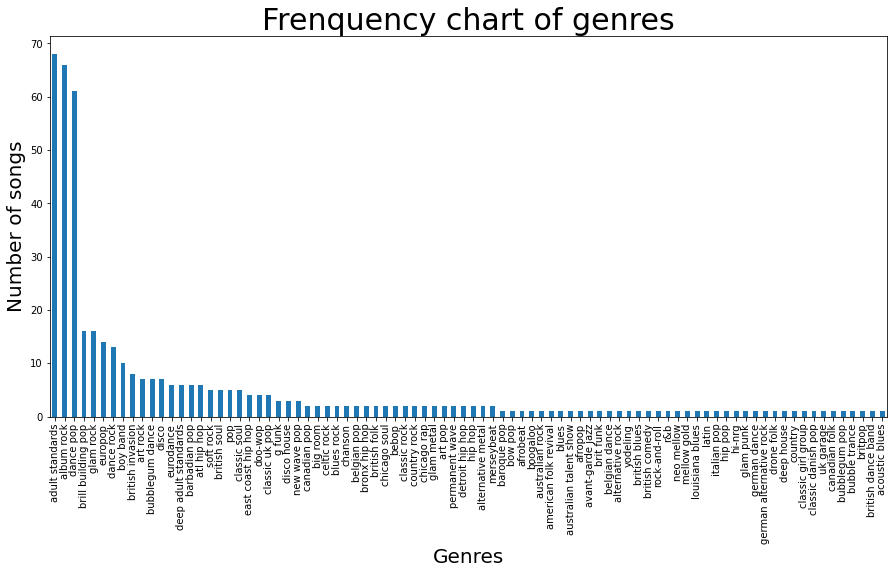

In [8]:
fig = plt.figure(figsize = (15,7))
df1.groupby('top genre')['title'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Number of songs', fontsize = 20)
plt.title('Frenquency chart of genres', fontsize = 30)

We can see that 3 particular genres have a high number of instances i.e. "adult standards", "album rock" and "dance-pop", increasing their weight in classification could be a good idea to increase accuracy score in certain methods. They will be more likely to be classified correctly for many methods. 

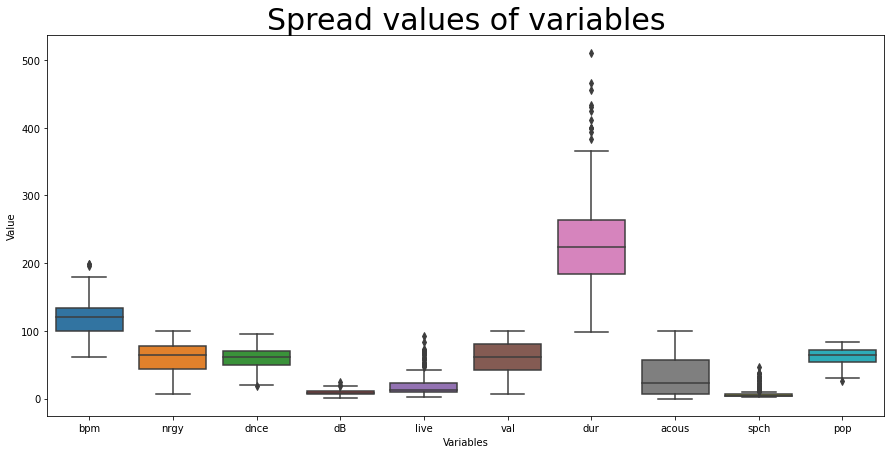

In [9]:
# Boxplot of variables, without genre Id and year
fig = plt.figure(figsize = (15,7))
sns.boxplot(data=df1.drop(['top genre','Id','year'], axis=1))
plt.xlabel('Variables')
plt.ylabel('Value')
plt.title('Spread values of variables', fontsize = 30)
plt.show()

This plot helps us to have a global vision of the spread of the variables. It also helps with comparing the variables. Additionally based on IQR we can determine which variables have outliers. In this case acous and dB.

There are many different ways of dealing with outliers, however, given the relatively small number of instances in the train set, we will cap and floor variables with the highest amount of outliers in accordance with their 10th and 90th percentile.

In [19]:
#capping and flooring the outliers (taken from regression file)
df1['dB'] = np.where(df1['dB'] <5, 5,df1['dB'])
df1['dB'] = np.where(df1['dB'] >15, 15,df1['dB'])
df2['dB'] = np.where(df2['dB'] <5, 5,df2['dB'])
df2['dB'] = np.where(df2['dB'] >15, 15,df2['dB'])
df1['acous'] = np.where(df1['acous'] <1, 1,df1['acous'])
df1['acous'] = np.where(df1['acous'] >81.4, 81.4,df1['acous'])
df2['acous'] = np.where(df2['acous'] <1, 1,df2['acous'])
df2['acous'] = np.where(df2['acous'] >81.4, 81.4,df2['acous'])

There is a strong negative correlation between acous and nrgy (-0.66) and a strong positive one between nrgy and dB (0.68). This heatmap mainly show us the accuracy of the data, we can see the logical correlation between the music features. Possibly removing one of them could result in higher accuracy in the models used as multicollinearity would be avoided.

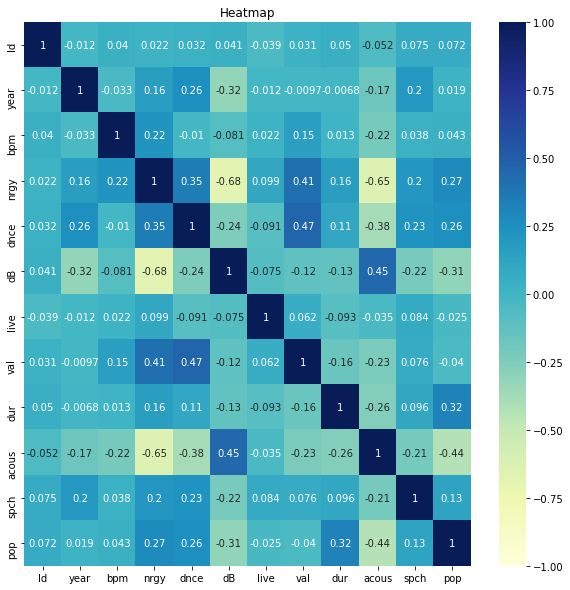

In [12]:
#heatmap of the variables
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Heatmap')
plt.show()

#### Defining X & y Variables 
Although the year column is in a numerical format, for the model it will have to be excluded as it is a categorical variable and we will not create a dummy variable from the year. Initially, all of the variables will be used for the classification problem, however, for the final model, the number of variables might change. Using only bpm, nrgy, dnce, dB, val, dur, acous, spch and popularity gave the best results thus only those will be used in the final model. 

In [20]:
#Define X and y
X = df1[['bpm', 'nrgy', 'dnce', 'dB', 'val', 'dur', 'acous', 'spch','pop']]
y = df1['top genre']

X_test_testset = df2[['bpm', 'nrgy', 'dnce', 'dB', 'val', 'dur', 'acous', 'spch','pop']]
#We removed the variable year because it is in numerical formal and we can't scale it the same way as the other variables. 

## Scaling 
### Standard Scaler

With most of the outliers capped and floored we can now scale the data using a standard scaler. Standard Scaler allows for a standardization of the dataset, doing this process prevents overemphasis on specific features that are not standard normally distributed. 
Standardizing a dataset is a must-do stage in most machine learning estimators. If not, the classification would have chances to behave very badly. 

In [21]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X) #Train dataset is being scales (X)
X_test_scaled =std_scaler.fit_transform(X_test_testset) #the same goes for test set

# Support vector machine

The first method we will use to try a classification is Support Vector Machine (SVM).
We are separating the data in classes, and we want to find a plane with the maximum margin. The higher is the margin, the lower is the number of error of generalization for the classifier. This allows for classifying better future data points. Although SVM is a binary classifier due to the fact it creates the hyperplane to discriminate two classes, we can make it a multiclass classifier by training it for every instance (One Versus Rest (OVR).  Using the default rbf kernel provided us with the best result. It achieved a minimum accuracy score of 0.13 and was able to identify 40% of the genres in its best run. However, on average this model achieved an accuracy score of approximately 23%. 

In [22]:
#SVC model with rbf kernel
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier

svc_clf = SVC(kernel='rbf',C=1)
clf = OneVsRestClassifier(SVC(kernel='rbf',C=1))
mean_r = 0
min_r = 1000
max_r = 0
iterations=100 #Runs 100 iterations to give the mean, min and max 
i=1
while i<iterations:
    X_train, X_test, y_train, y_test=model_selection.train_test_split(X_scaled, y, test_size=0.15)
    clf.fit(X_train, y_train)
    spotify_predictions = clf.predict(X_test)
    score = accuracy_score(y_test, spotify_predictions)
    mean_r += score
  
    if score < min_r:
        min_r=score
    if score > max_r:
        max_r = score

    i+=1
print(mean_r/iterations)
print(min_r) 
print(max_r)

0.2366666666666666
0.13636363636363635
0.4090909090909091


## KNeighborsClassifier

K-nearest neighbours is a supervised technique that assumes the similarity between the new data and the data which is available, along with the new case is filled in the category that has a high similarity to the available categories.
This algorithm takes no underlying assumptions on the data distribution. N_neighbours parameter represents the number of closet neighbours to be used for the classification. Given the fact that there is a high number of genres with only one instance in the train set, the n_neighbours will be set to 4 to capture the most frequent genres. Despite low consistency in delivering accurate predictions (min accuracy score of 0.07, max accuracy score of 0.37), this model performed the best with all points in each neighbourhood being weighted equally, giving an average accuracy score of 0.24.

The code below runs 1000 iterations of the KNeighborsClassifier classifier, giving us the mean results along with the absolute minimum and potential maximum values.

In [16]:
#100 iterations give average KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(weights= "uniform", algorithm= "auto", leaf_size= 50, n_neighbors=4) 
mean_r = 0
min_r = 1000
max_r = 0
iterations=100 #Runs 100 iterations to give the mean, min and max 
i=1
while i<iterations:
    X_train, X_test, y_train, y_test=model_selection.train_test_split(X_scaled, y, test_size=0.15)
    clf.fit(X_train, y_train)
    spotify_predictions = clf.predict(X_test)
    score = accuracy_score(y_test, spotify_predictions)
    mean_r += score
  
    if score < min_r:
        min_r=score
    if score > max_r:
        max_r = score

    i+=1
print(mean_r/iterations) #Averaging 0.20 (20%)
print(min_r) #Min around 0.06 (7%)
print(max_r) #Max around 0.36 (39%)

0.24846969696969703
0.07575757575757576
0.3787878787878788


The reason behind the poor performance of the KNeighborsClassifier in some cases, might be too many variables used in the model. To reduce the dimensionality of the trainset the PCA was applied, however, it did not improve the performance of KNeighborsClassifier in this case. 

## Principle Compotent Analysis  (PCA)

The goal of  PCA is to reduce the linear dimensionality. The method is using a singular value decomposition. It is initiated on the data and allows us to extract decomposition from the high dimensionality data and to dispose of it in a lower dimensionality space.

PCA will be useful for this data because linear dimensionality is high. We have set PCA to X2D, using this will allow us to improve the Random Forest Classifier results. Rather than choosing the number of components manually, we will set the PCA to explain 95% of the variance.

In [20]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X)
X2D = pca.transform(X)

## Random Forest Classifer 

Random Forest is an ensemble learning method, it creates numerous decision trees in a process of outputting and training the average prediction, that is given by the trees. This method does not need called data and is not sensitive to random outliers. 
In this case, we used n_estimators = 500, to increase the number of trees in the forest to have a better potential output. Allowing all of the jobs to run in parallel and setting the max_leaf_nodes to 16 allowed for the model to achieve the highest accuracy score. The minimum number of samples per leaf was set to 1 (default) as. Although the initial idea was to use PCA components for this algorithm it came out that it achieved better performance by just using the scaled features. With 100 iterations of Random Forest Classifier predictions, giving an average accuracy score of nearly 30%, along with a minimum of 19% and a maximum of 43%, model performs slighty better than the provious two. 

In [23]:
#Random Forest Classfier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, min_samples_leaf=1)
mean_r = 0
min_r = 100
max_r = 0
iterations=100 #Runs 100 iterations only as it requires more computing power 
i=1
while i<iterations:
    X_train, X_test, y_train, y_test=model_selection.train_test_split(X_scaled, y, test_size=0.15)
    clf.fit(X_train, y_train)
    spotify_predictions = clf.predict(X_test)
    score = accuracy_score(y_test, spotify_predictions)
    mean_r += score
  
    if score < min_r:
        min_r=score
    if score > max_r:
        max_r = score

    i+=1
print(mean_r/iterations) 
print(min_r) 
print(max_r) 

0.30060606060606054
0.19696969696969696
0.4393939393939394


## Voting Classifier

By using Voting Classifier can combine the predictions of previous estimators, this will improve the robustness of the model over previously used estimators. In this case, we have used the models that have achieved the best performance so far i.e. Random Forest Classifier and SVC. In this case, Voting Classifier achieved worse results than the SVC on the train data (min 16%, max 39%, mean 27%. 

In [24]:

from sklearn.ensemble import VotingClassifier

clf1 = OneVsRestClassifier(SVC(kernel='rbf',C=1))
clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, min_samples_leaf=1)
clf = VotingClassifier(estimators=[('SVC', clf1), ('RFC', clf2)])

mean_r = 0
min_r = 100
max_r = 0
iterations=100 #Runs 100 iterations to give the mean, min and max 
i=1
while i<iterations:
    X_train, X_test, y_train, y_test=model_selection.train_test_split(X_scaled, y, test_size=0.15)
    clf.fit(X_train, y_train)
    spotify_predictions = clf.predict(X_test)
    score = accuracy_score(y_test, spotify_predictions)
    mean_r += score
  
    if score < min_r:
        min_r=score
    if score > max_r:
        max_r = score

    i+=1
print(mean_r/iterations) 
print(min_r) 
print(max_r)

0.2740909090909092
0.15151515151515152
0.4090909090909091


# Kaggle Competition And Final Analysis
Similarly to our results the best performing model in our case was Random Forest Classifier which achieved  accuracy score of 26.785% in the kaggle competition. As shown in Precision and Recall section, that's because the classification models used can classify only fraction of the avalivable genres which are: adult standards, album rock, brill building pop, bronx hip-hop. Because the majority of the predictions are within adult standards (149), album rock (133) and dance-pop (112) it is wise to assume that approximately 26.7% of the test set are those genres, hence our score. The possible reason behind that lies down in the fact that those genres are most frequent in the train set, making the algorithms more likely to classify each song as one of them.

In [25]:
#predictions for the kaggle
clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, min_samples_leaf=1)
clf.fit(X_scaled,y)
predictions = clf.predict(X_test_scaled) #Prediction output 
df2_check=pd.read_csv(r"/Users/aleksanderbielinski/Downloads/cs9856-spotify-classification-problem-2021/CS98XClassificationTest.csv")
df2_check= df2_check.loc[:, :'Id']
pd.set_option('display.max_rows',114)
eval_2=pd.concat([df2_check, pd.DataFrame(predictions)], axis=1)
eval_2.columns = ['id', 'top genre']
eval_2.to_csv(r'/Users/aleksanderbielinski/Desktop/class5.csv',index=False)

## Precision and Recall

Precision and Recall allow us to evaluate the efficiency of our final chosen model (Voting Classifier).

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, min_samples_leaf=1)
#clf = VotingClassifier(estimators=[('SVC', clf1), ('RFC', clf2)])
clf.fit(X_scaled,y)
y_pred = clf.predict(X_scaled)
#confusion_matrix(y,y_pred)
#pd.crosstab(y,y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Below we can see the classification report which precision and recall scores for each genre predicted by our model (Random Forest Classifier). Precision is the ratio of correct classifications out of those classified in the category, whereas recall is the fraction of relevant instances that were retrieved. F1 score is the harmonic mean of precision and recall and shows the model's accuracy. As explained earlier the model favours classification of adult standards (f1=56%, precision= 41%, recall=90%), album rock (f1=8%, precision=44%, recall=88%), dance-pop (f1=62%, precision=48%, recall=89%) with weighted average precision of 20% and recall of 39% it achieved nearly 40% accuracy. However, when using Voting Classifier apart from the earlier mentioned 3 genres which achieved similar scores, it predicts well genres such as bubblegum dance (f1=77%, precision=83%, recall=71%) and boy band (f1=71%, precision=86%, recall=60%). The weighted average precision of the Voting Classifier is 33%, recall is 48% and f1 is 36%, resulting in an accuracy score of 48%. Although Voting Classifier seems to predict more genres better the higher score on Kaggle was achieved by using Random Forest Classifier (21.48% vs 26.785%), suggesting that the majority of genres within the test set are adult standards, album rock and dance-pop.

In [31]:
#print(classification_report(y,y_pred))

# Final Reflections
Although our final model achieved higher accuracy than the random classification baseline provided within the Kaggle competition (26.785% vs 16.071%), the overall performance of it remains low considering other participants. The top score within the Kaggle competition is 60.714% meaning that our model is approximately 2 times less accurate than the best model created so far. However, given the fact that we were only able to classify only 6 genres types its not surprising. Considering the small number of instances for most of the genres, training the binary classifier on each instance using One Versus One classifier (OVO) with appropriately chosen variables could yield better results. However, the OVO algorithm scales pretty badly and it would require high computation power to fit it on the larger datasets.